In [1]:
import numpy as np
import pandas as pd
import StringIO

import flotilla
from flotilla.external.combat import combat

# Turn on inline plots
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
%%bash 
wget http://www.brainspan.org/api/v2/well_known_file_download/267666525

--2015-05-07 21:17:26--  http://www.brainspan.org/api/v2/well_known_file_download/267666525
Resolving www.brainspan.org... 63.237.233.39
Connecting to www.brainspan.org|63.237.233.39|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: '267666525.6'

     0K .......... .......... .......... .......... ..........  413K
    50K .......... .......... .......... .......... ..........  855K
   100K .......... .......... .......... .......... .......... 1.35M
   150K .......... .......... .......... .......... ..........  902K
   200K .......... .......... .......... .......... .......... 1.32M
   250K .......... .......... .......... .......... ..........  885K
   300K .......... .......... .......... .......... ..........  954K
   350K .......... .......... .......... .......... .......... 1.26M
   400K .......... .......... .......... .......... ..........  901K
   450K .......... .......... .......... .......... ..........  583

In [3]:
%%bash
unzip 267666525

Archive:  267666525


replace expression_matrix.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(assuming [N]one)


Ooh, there's a readme! Let's take a look at what it says.

In [4]:
cat readme.txt

In [5]:
expression = pd.read_csv('expression_matrix.csv', index_col=0, header=None)
print(expression.shape)
expression.head()

(52376, 524)


,1,2,3,4,5,6,7,8,9,10,...,515,516,517,518,519,520,521,522,523,524
0,,,,,,,,,,,,,,,,,,,,,
1,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,...,2.320932,1.781548,2.277359,1.832737,1.555696,2.081944,3.484685,4.816781,3.034464,3.082820
2,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,...,0.758571,0.000000,0.061869,0.026876,0.100691,0.140675,0.300576,0.126526,0.000000,0.424134
3,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,...,23.769167,20.142132,20.063257,16.575379,18.783516,21.631293,28.006120,28.731717,16.679597,28.866042
4,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,...,1.593009,1.563377,1.648571,2.231466,2.040326,2.161741,1.275352,1.184766,1.735579,1.500363
5,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,...,0.583488,0.797376,0.607141,0.575555,0.606445,0.683625,0.495084,0.761265,0.766482,0.468859


In [6]:
columns_metadata = pd.read_csv('columns_metadata.csv', index_col=0)
print(columns_metadata.shape)
columns_metadata.head()

(524, 7)


,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name
column_num,,,,,,,
1,13058,H376.IIA.51,8 pcw,M,10268,Ocx,occipital neocortex
2,13058,H376.IIA.51,8 pcw,M,10291,M1C-S1C,primary motor-sensory cortex (samples)
3,13058,H376.IIA.51,8 pcw,M,10361,AMY,amygdaloid complex
4,13058,H376.IIA.51,8 pcw,M,10550,MGE,medial ganglionic eminence
5,13058,H376.IIA.51,8 pcw,M,10243,STC,posterior (caudal) superior temporal cortex (a...


In [7]:
columns_metadata['sample_id'] = columns_metadata.donor_name + '_' + columns_metadata.structure_acronym
print(columns_metadata['sample_id'].unique().shape)
columns_metadata['sample_id'].head()

(524,)


column_num
1        H376.IIA.51_Ocx
2    H376.IIA.51_M1C-S1C
3        H376.IIA.51_AMY
4        H376.IIA.51_MGE
5        H376.IIA.51_STC
Name: sample_id, dtype: object

In [8]:
columns_metadata = columns_metadata.set_index('sample_id')
columns_metadata.head()

,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name
sample_id,,,,,,,
H376.IIA.51_Ocx,13058,H376.IIA.51,8 pcw,M,10268,Ocx,occipital neocortex
H376.IIA.51_M1C-S1C,13058,H376.IIA.51,8 pcw,M,10291,M1C-S1C,primary motor-sensory cortex (samples)
H376.IIA.51_AMY,13058,H376.IIA.51,8 pcw,M,10361,AMY,amygdaloid complex
H376.IIA.51_MGE,13058,H376.IIA.51,8 pcw,M,10550,MGE,medial ganglionic eminence
H376.IIA.51_STC,13058,H376.IIA.51,8 pcw,M,10243,STC,posterior (caudal) superior temporal cortex (a...


In [9]:
expression.columns = columns_metadata.index
expression.head()

sample_id,H376.IIA.51_Ocx,H376.IIA.51_M1C-S1C,H376.IIA.51_AMY,H376.IIA.51_MGE,H376.IIA.51_STC,H376.IIA.51_URL,H376.IIA.51_CGE,H376.IIA.51_DTH,H376.IIA.51_MFC,H376.IIA.51_DFC,...,H376.XI.56_A1C,H376.XI.56_CBC,H376.XI.56_V1C,H376.XI.56_OFC,H376.XI.56_STC,H376.XI.56_IPC,H376.XI.56_M1C,H376.XI.56_HIP,H376.XI.56_STR,H376.XI.56_S1C
0,,,,,,,,,,,,,,,,,,,,,
1,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,...,2.320932,1.781548,2.277359,1.832737,1.555696,2.081944,3.484685,4.816781,3.034464,3.082820
2,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,...,0.758571,0.000000,0.061869,0.026876,0.100691,0.140675,0.300576,0.126526,0.000000,0.424134
3,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,...,23.769167,20.142132,20.063257,16.575379,18.783516,21.631293,28.006120,28.731717,16.679597,28.866042
4,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,...,1.593009,1.563377,1.648571,2.231466,2.040326,2.161741,1.275352,1.184766,1.735579,1.500363
5,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,...,0.583488,0.797376,0.607141,0.575555,0.606445,0.683625,0.495084,0.761265,0.766482,0.468859


In [10]:
rows_metadata = pd.read_csv('rows_metadata.csv', index_col=0)
rows_metadata.head()

,gene_id,ensembl_gene_id,gene_symbol,entrez_id
row_num,,,,
1,7062,ENSG00000000003,TSPAN6,7105
2,40735,ENSG00000000005,TNMD,64102
3,8736,ENSG00000000419,DPM1,8813
4,36423,ENSG00000000457,SCYL3,57147
5,35021,ENSG00000000460,C1orf112,55732


In [11]:
expression_feature_data = rows_metadata.set_index('ensembl_gene_id')
expression_feature_data.head()

,gene_id,gene_symbol,entrez_id
ensembl_gene_id,,,
ENSG00000000003,7062,TSPAN6,7105
ENSG00000000005,40735,TNMD,64102
ENSG00000000419,8736,DPM1,8813
ENSG00000000457,36423,SCYL3,57147
ENSG00000000460,35021,C1orf112,55732


In [12]:
expression.index = expression_feature_data.index
expression.head()

sample_id,H376.IIA.51_Ocx,H376.IIA.51_M1C-S1C,H376.IIA.51_AMY,H376.IIA.51_MGE,H376.IIA.51_STC,H376.IIA.51_URL,H376.IIA.51_CGE,H376.IIA.51_DTH,H376.IIA.51_MFC,H376.IIA.51_DFC,...,H376.XI.56_A1C,H376.XI.56_CBC,H376.XI.56_V1C,H376.XI.56_OFC,H376.XI.56_STC,H376.XI.56_IPC,H376.XI.56_M1C,H376.XI.56_HIP,H376.XI.56_STR,H376.XI.56_S1C
ensembl_gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,...,2.320932,1.781548,2.277359,1.832737,1.555696,2.081944,3.484685,4.816781,3.034464,3.082820
ENSG00000000005,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,...,0.758571,0.000000,0.061869,0.026876,0.100691,0.140675,0.300576,0.126526,0.000000,0.424134
ENSG00000000419,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,...,23.769167,20.142132,20.063257,16.575379,18.783516,21.631293,28.006120,28.731717,16.679597,28.866042
ENSG00000000457,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,...,1.593009,1.563377,1.648571,2.231466,2.040326,2.161741,1.275352,1.184766,1.735579,1.500363
ENSG00000000460,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,...,0.583488,0.797376,0.607141,0.575555,0.606445,0.683625,0.495084,0.761265,0.766482,0.468859


In [13]:
# From the technical white paper: 
# http://help.brain-map.org/download/attachments/3506181/Transcriptome_Profiling.pdf?version=1&modificationDate=1382036562736
development_string = """Stage,Age,Developmental Period
1,4-7 pcw,Embryonic
2A,8-9 pcw,Early prenatal
2B,10-12 pcw,Early prenatal
3A,13-15 pcw,Early mid-prenatal
3B,16-18 pcw,Early mid-prenatal
4,19-24 pcw,Late_mid-prenatal
5,25-38 pcw,Late_prenatal
6,Birth-5 months,Early_infancy
7,6-18 months,Late_infancy
8,19 months-5 yrs,Early_childhood
9,6-11 yrs,Late_childhood
10,12-19 yrs,Adolescence
11,20-60+ yrs,Adulthood
"""

development = pd.read_csv(StringIO.StringIO(development_string))
development

,Stage,Age,Developmental Period
0,1,4-7 pcw,Embryonic
1,2A,8-9 pcw,Early prenatal
2,2B,10-12 pcw,Early prenatal
3,3A,13-15 pcw,Early mid-prenatal
4,3B,16-18 pcw,Early mid-prenatal
5,4,19-24 pcw,Late_mid-prenatal
6,5,25-38 pcw,Late_prenatal
7,6,Birth-5 months,Early_infancy
8,7,6-18 months,Late_infancy
9,8,19 months-5 yrs,Early_childhood


In [14]:
columns_metadata.age.unique()

array(['8 pcw', '9 pcw', '12 pcw', '13 pcw', '16 pcw', '17 pcw', '19 pcw',
       '21 pcw', '24 pcw', '25 pcw', '26 pcw', '35 pcw', '37 pcw', '4 mos',
       '10 mos', '1 yrs', '2 yrs', '3 yrs', '4 yrs', '8 yrs', '11 yrs',
       '13 yrs', '15 yrs', '18 yrs', '19 yrs', '21 yrs', '23 yrs',
       '30 yrs', '36 yrs', '37 yrs', '40 yrs'], dtype=object)

In [15]:
def age_range_to_single_values(x):
    if x == 'Birth-5 months':
        return ['{} mos'.format(age) for age in range(1, 6)]
    elif x == '19 months-5 yrs':
        return ['{} mos'.format(age) for age in range(19, 24)] + ['{} yrs'.format(age) for age in range(2, 6)]
    else:
        age_range, time_unit = x.split()
        start, stop = map(int, age_range.rstrip('+').split('-'))
        if time_unit == 'months':
            time_unit = 'mos'
        age_range = range(start, stop+1)
        if time_unit == 'mos':
            time_units = ['mos' if a % 12 != 0 else 'yrs' for a in age_range]
            age_range = [a if a % 12 != 0 else a/12 for a in age_range]
        else:
            time_units = [time_unit] * len(age_range)
        return ['{} {}'.format(age, unit) for age, unit in zip(age_range, time_units)]

development.Age.map(age_range_to_single_values)

0                          [4 pcw, 5 pcw, 6 pcw, 7 pcw]
1                                        [8 pcw, 9 pcw]
2                              [10 pcw, 11 pcw, 12 pcw]
3                              [13 pcw, 14 pcw, 15 pcw]
4                              [16 pcw, 17 pcw, 18 pcw]
5      [19 pcw, 20 pcw, 21 pcw, 22 pcw, 23 pcw, 24 pcw]
6     [25 pcw, 26 pcw, 27 pcw, 28 pcw, 29 pcw, 30 pc...
7                   [1 mos, 2 mos, 3 mos, 4 mos, 5 mos]
8     [6 mos, 7 mos, 8 mos, 9 mos, 10 mos, 11 mos, 1...
9     [19 mos, 20 mos, 21 mos, 22 mos, 23 mos, 2 yrs...
10         [6 yrs, 7 yrs, 8 yrs, 9 yrs, 10 yrs, 11 yrs]
11    [12 yrs, 13 yrs, 14 yrs, 15 yrs, 16 yrs, 17 yr...
12    [20 yrs, 21 yrs, 22 yrs, 23 yrs, 24 yrs, 25 yr...
Name: Age, dtype: object

In [16]:
range_to_single_value = dict(zip(development.Age, development.Age.map(age_range_to_single_values)))

In [17]:
single_value_to_range = {}
for k, values in range_to_single_value.iteritems():
    for v in values:
        single_value_to_range[v] = k
single_value_to_range = pd.Series(single_value_to_range)
single_value_to_range.head()

1 mos     Birth-5 months
1 yrs        6-18 months
10 mos       6-18 months
10 pcw         10-12 pcw
10 yrs          6-11 yrs
dtype: object

In [18]:
single_value_to_range_df = single_value_to_range.to_frame()
single_value_to_range_df = single_value_to_range_df.reset_index()
single_value_to_range_df.columns = ['age_single_value', 'age_range']
single_value_to_range_df.head()

,age_single_value,age_range
0,1 mos,Birth-5 months
1,1 yrs,6-18 months
2,10 mos,6-18 months
3,10 pcw,10-12 pcw
4,10 yrs,6-11 yrs


In [19]:
development = development.merge(single_value_to_range_df, left_on='Age', right_on='age_range', how='outer')
development.head()

,Stage,Age,Developmental Period,age_single_value,age_range
0,1,4-7 pcw,Embryonic,4 pcw,4-7 pcw
1,1,4-7 pcw,Embryonic,5 pcw,4-7 pcw
2,1,4-7 pcw,Embryonic,6 pcw,4-7 pcw
3,1,4-7 pcw,Embryonic,7 pcw,4-7 pcw
4,2A,8-9 pcw,Early prenatal,8 pcw,8-9 pcw


In [20]:
columns_metadata = columns_metadata.reset_index()
columns_metadata = columns_metadata.merge(development, left_on='age', right_on='age_single_value')
columns_metadata.head()

,sample_id,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name,Stage,Age,Developmental Period,age_single_value,age_range
0,H376.IIA.51_Ocx,13058,H376.IIA.51,8 pcw,M,10268,Ocx,occipital neocortex,2A,8-9 pcw,Early prenatal,8 pcw,8-9 pcw
1,H376.IIA.51_M1C-S1C,13058,H376.IIA.51,8 pcw,M,10291,M1C-S1C,primary motor-sensory cortex (samples),2A,8-9 pcw,Early prenatal,8 pcw,8-9 pcw
2,H376.IIA.51_AMY,13058,H376.IIA.51,8 pcw,M,10361,AMY,amygdaloid complex,2A,8-9 pcw,Early prenatal,8 pcw,8-9 pcw
3,H376.IIA.51_MGE,13058,H376.IIA.51,8 pcw,M,10550,MGE,medial ganglionic eminence,2A,8-9 pcw,Early prenatal,8 pcw,8-9 pcw
4,H376.IIA.51_STC,13058,H376.IIA.51,8 pcw,M,10243,STC,posterior (caudal) superior temporal cortex (a...,2A,8-9 pcw,Early prenatal,8 pcw,8-9 pcw


In [21]:
columns_metadata = columns_metadata.drop(['Age', 'age_single_value'], axis=1)

In [22]:
columns_metadata = columns_metadata.set_index('sample_id')
columns_metadata.head()

,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name,Stage,Developmental Period,age_range
sample_id,,,,,,,,,,
H376.IIA.51_Ocx,13058,H376.IIA.51,8 pcw,M,10268,Ocx,occipital neocortex,2A,Early prenatal,8-9 pcw
H376.IIA.51_M1C-S1C,13058,H376.IIA.51,8 pcw,M,10291,M1C-S1C,primary motor-sensory cortex (samples),2A,Early prenatal,8-9 pcw
H376.IIA.51_AMY,13058,H376.IIA.51,8 pcw,M,10361,AMY,amygdaloid complex,2A,Early prenatal,8-9 pcw
H376.IIA.51_MGE,13058,H376.IIA.51,8 pcw,M,10550,MGE,medial ganglionic eminence,2A,Early prenatal,8-9 pcw
H376.IIA.51_STC,13058,H376.IIA.51,8 pcw,M,10243,STC,posterior (caudal) superior temporal cortex (a...,2A,Early prenatal,8-9 pcw


In [51]:
study_uncorrected = flotilla.Study(columns_metadata,
                                   metadata_phenotype_col='structure_name',
                                   metadata_ignore_subset_cols=['donor_id', 'structure_id', 'structure_acronym', 'Stage'],
                                   metadata_minimum_samples=3,
                                   expression_data=expression.T,
                                   expression_thresh=1,
                                   expression_plus_one=True, 
                                   expression_log_base=2,
                                   species='hg19')

2015-05-08 12:56:08	Initializing Study
2015-05-08 12:56:08	Initializing Predictor configuration manager for Study
2015-05-08 12:56:08	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-05-08 12:56:08	Added ExtraTreesClassifier to default predictors
2015-05-08 12:56:08	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-05-08 12:56:08	Added ExtraTreesRegressor to default predictors
2015-05-08 12:56:08	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-05-08 12:56:08	Added GradientBoostingClassifier to default predictors
2015-05-08 12:56:08	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2015-05-08 12:56:08	Added GradientBoostingRegressor to default predictors
2015-05-08 12:56:08	Loading metadata
2015-05-08 12:56:09	Loading species metadata from ~/f

No phenotype to color mapping was provided, falling back on reasonable defaults.
No phenotype to marker (matplotlib plotting symbol) was provided, falling back on reasonable defaults.


In [29]:
print(study_uncorrected.expression.data_original.shape)
print(study_uncorrected.expression.data.shape)

(524, 52376)
(524, 25370)


In [48]:
study_uncorrected.save('brainspan_uncorrected')

Wrote datapackage to /Users/olga/flotilla_projects/brainspan_uncorrected/datapackage.json


In [49]:
! cat $HOME/flotilla_packages/brainspan_uncorrected/datapackage.json

cat: /Users/olga/flotilla_packages/brainspan_uncorrected/datapackage.json: No such file or directory


/Users/olga/anaconda/lib/python2.7/site-packages/pandas/core/index.py:705: FutureWarning: slice indexers when using iloc should be integers and not floating point
  "and not floating point",FutureWarning)


/Users/olga/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


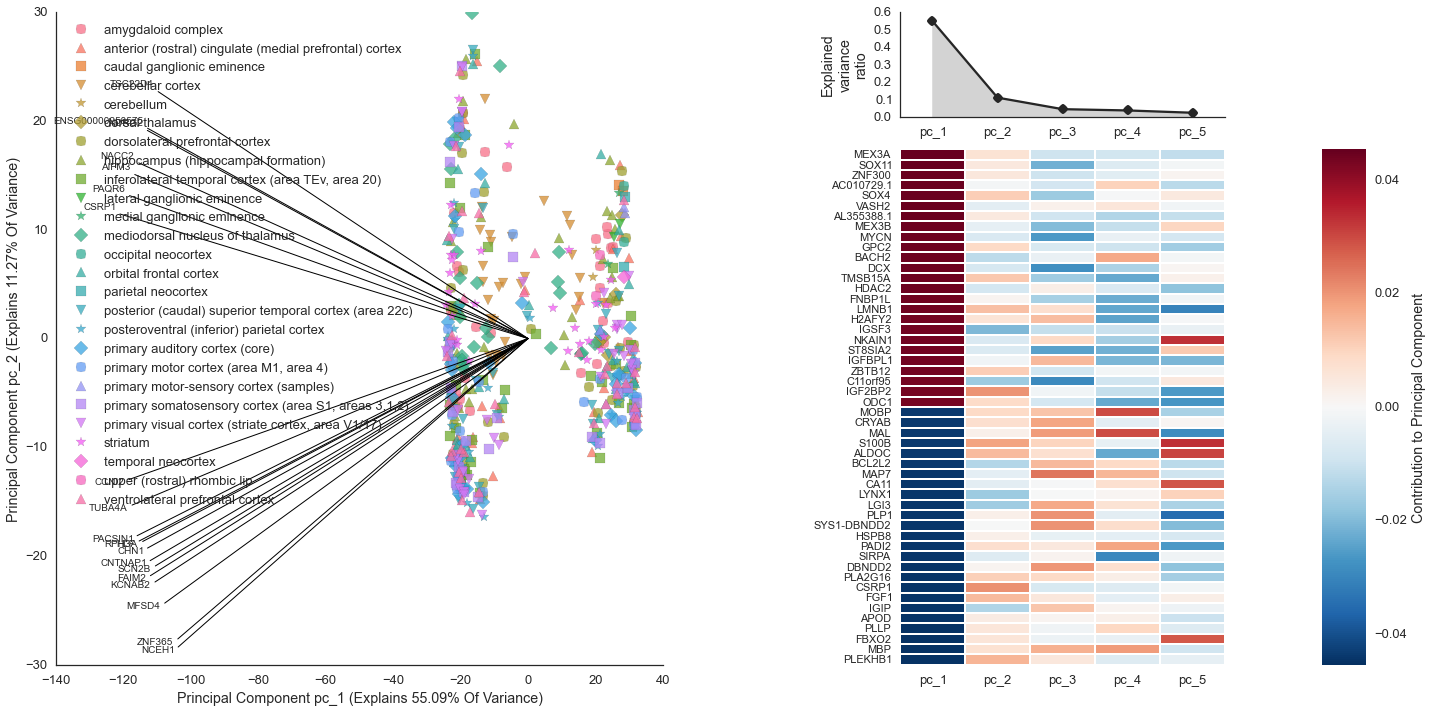

In [24]:
study_uncorrected.plot_pca()

In [25]:
pd.Categorical(study_uncorrected.metadata.data.Stage, categories=['2A','2B'] + map(str, range(3, 12)), ordered=True)

[2A, 2A, 2A, 2A, 2A, ..., 11, 11, 11, 11, 11]
Name: Stage, Length: 524
Categories (11, object): [2A < 2B < 3 < 4 ... 8 < 9 < 10 < 11]

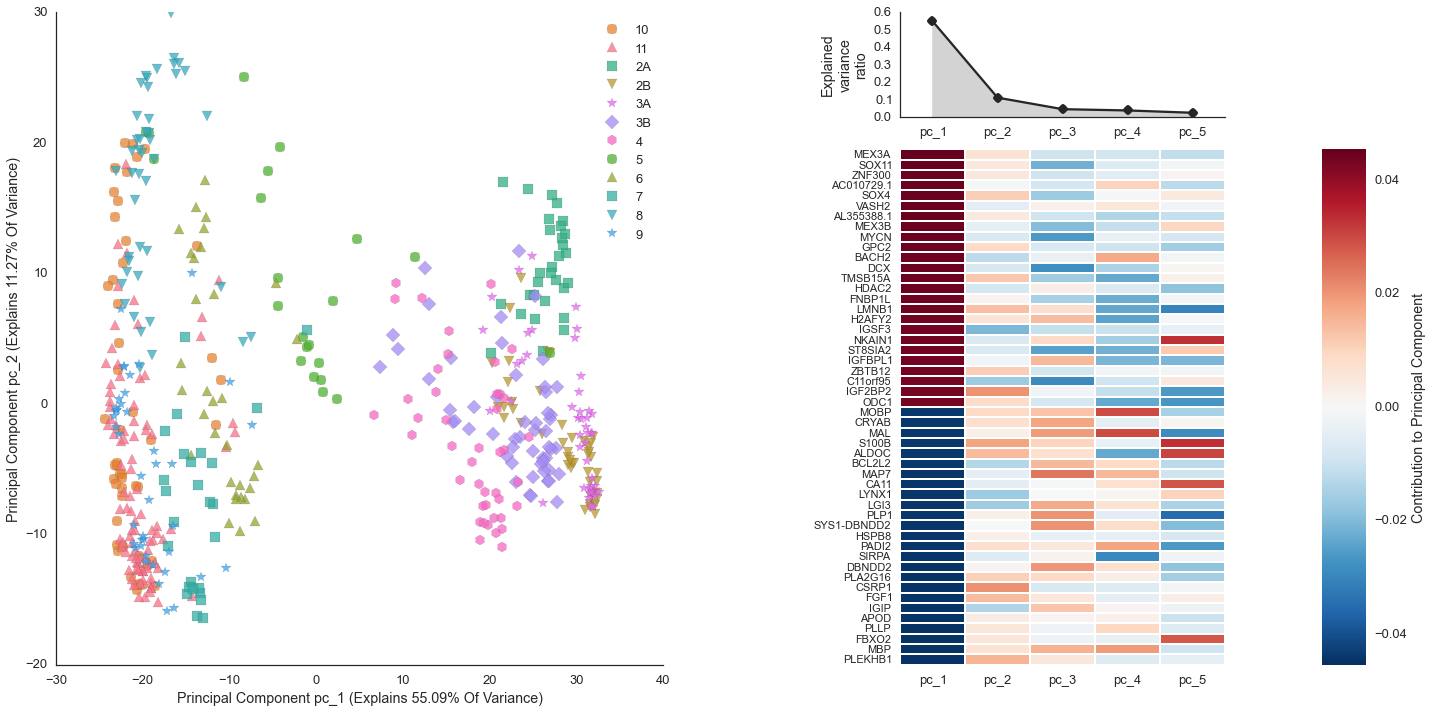

In [40]:
study_uncorrected.plot_pca(color_samples_by='Stage', show_vectors=False)

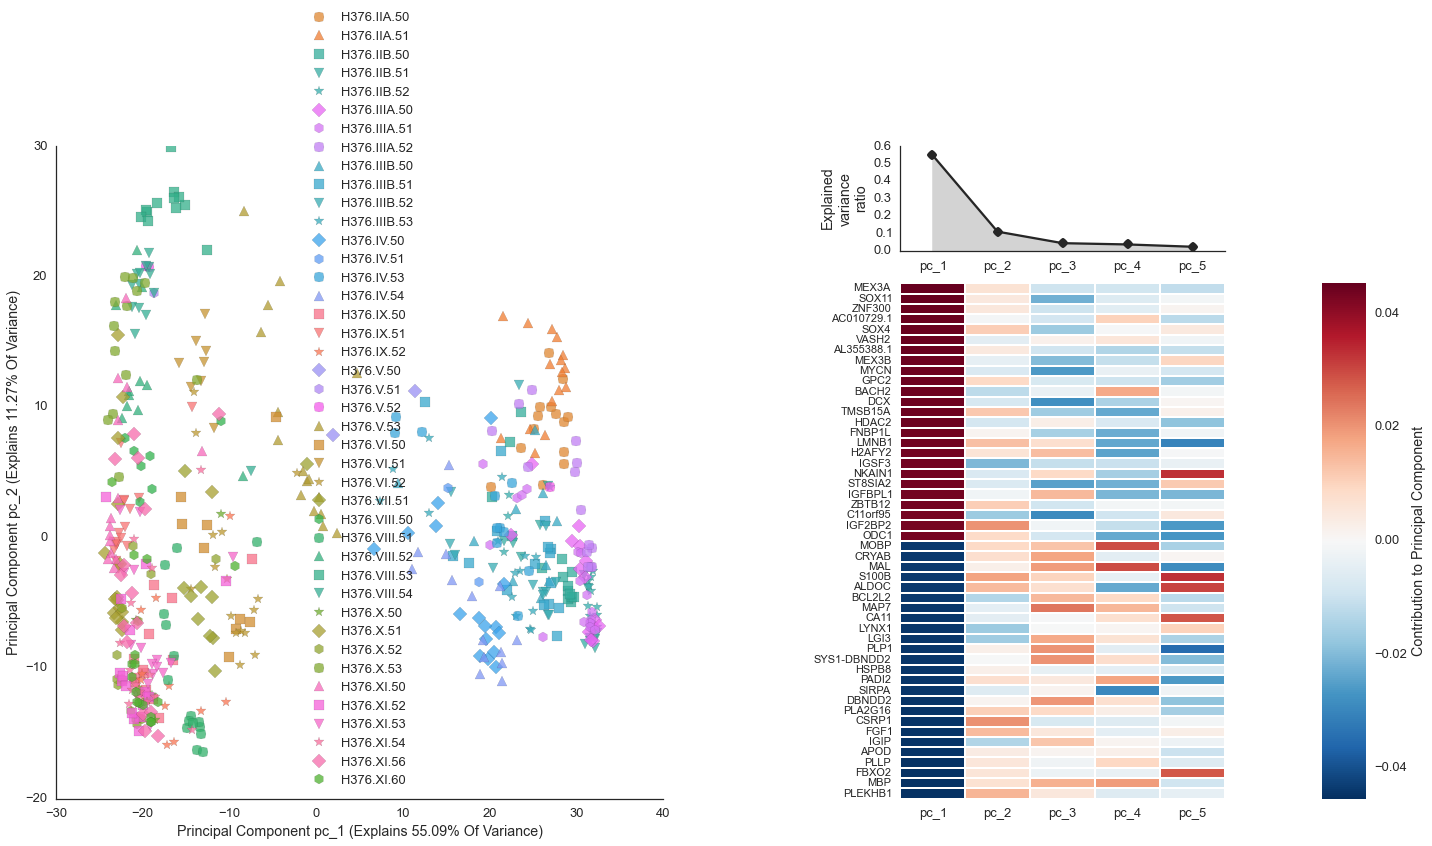

In [26]:
study_uncorrected.plot_pca(color_samples_by='donor_name', show_vectors=False)

In [30]:
data = study_uncorrected.expression.data

In [33]:
data = data.groupby(study_uncorrected.metadata.data.donor_name).filter(lambda x: len(x) >= 3)
data.shape

(519, 25370)

In [39]:
data = data.T
data.head()

sample_id,H376.IIA.51_Ocx,H376.IIA.51_M1C-S1C,H376.IIA.51_AMY,H376.IIA.51_MGE,H376.IIA.51_STC,H376.IIA.51_URL,H376.IIA.51_CGE,H376.IIA.51_DTH,H376.IIA.51_MFC,H376.IIA.51_DFC,...,H376.XI.56_A1C,H376.XI.56_CBC,H376.XI.56_V1C,H376.XI.56_OFC,H376.XI.56_STC,H376.XI.56_IPC,H376.XI.56_M1C,H376.XI.56_HIP,H376.XI.56_STR,H376.XI.56_S1C
ensembl_gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,5.226783,4.658283,4.345572,4.841400,4.392196,3.970916,4.835323,4.135878,5.510576,5.521802,...,1.731588,1.475888,1.712534,1.502197,1.353716,1.623841,2.165007,2.540221,2.012377,2.029566
ENSG00000000419,5.144586,4.443982,4.302681,4.546363,4.338313,3.587409,4.722171,4.222753,5.083345,5.291219,...,4.630473,4.402049,4.396657,4.135484,4.306227,4.500247,4.858285,4.893931,4.144013,4.900434
ENSG00000000457,2.427428,2.386127,1.828561,2.202814,1.981479,1.767732,2.205906,1.837513,2.164727,2.204714,...,1.374627,1.358046,1.405214,1.692189,1.604226,1.660719,1.186090,1.127479,1.451846,1.322138
ENSG00000000460,2.309502,2.176576,1.603029,2.165762,1.667772,0.999779,2.163999,1.458155,2.245368,2.189239,...,0.663106,0.845892,0.684497,0.655860,0.683872,0.751571,0.580227,0.816612,0.820879,0.554696
ENSG00000000938,0.315188,0.341389,0.319835,0.190802,0.553545,0.374614,0.110952,0.201411,0.268087,0.333658,...,1.213659,1.614557,1.116520,0.749842,0.575668,0.493599,1.360653,1.176348,1.452276,1.396641


In [41]:
batch = study_uncorrected.metadata.data.donor_name[data.columns]

In [44]:
expression_batch_corrected = combat(data, batch, False)
expression_batch_corrected.head()

found 39 batches
found 0 numerical covariates...
found 0 categorical variables:
	
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments

adjusting data


sample_id,H376.IIA.51_Ocx,H376.IIA.51_M1C-S1C,H376.IIA.51_AMY,H376.IIA.51_MGE,H376.IIA.51_STC,H376.IIA.51_URL,H376.IIA.51_CGE,H376.IIA.51_DTH,H376.IIA.51_MFC,H376.IIA.51_DFC,...,H376.XI.56_A1C,H376.XI.56_CBC,H376.XI.56_V1C,H376.XI.56_OFC,H376.XI.56_STC,H376.XI.56_IPC,H376.XI.56_M1C,H376.XI.56_HIP,H376.XI.56_STR,H376.XI.56_S1C
ensembl_gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,3.271437,2.668255,2.336467,2.862543,2.385935,1.938953,2.856095,2.113980,3.572543,3.584454,...,2.579732,2.292851,2.558354,2.322368,2.155781,2.458846,3.066004,3.486973,2.894762,2.914047
ENSG00000000419,4.078584,3.549268,3.442513,3.626619,3.469434,2.902116,3.759444,3.382126,4.032315,4.189367,...,3.802635,3.608618,3.604038,3.382205,3.527229,3.692024,3.996132,4.026408,3.389450,4.031932
ENSG00000000457,1.962529,1.917956,1.316221,1.720121,1.481253,1.250574,1.723458,1.325883,1.679018,1.722171,...,1.563822,1.546834,1.595158,1.889166,1.799048,1.856925,1.370663,1.310616,1.642933,1.510045
ENSG00000000460,1.179039,1.098567,0.751350,1.092021,0.790544,0.386150,1.090954,0.663645,1.140213,1.106234,...,0.846497,1.079640,0.873780,0.837255,0.872983,0.959333,0.740785,1.042293,1.047735,0.708220
ENSG00000000938,0.837768,0.874164,0.844223,0.664980,1.168874,0.920318,0.554060,0.679717,0.772339,0.863425,...,0.953444,1.227058,0.887146,0.636888,0.518013,0.462001,1.053768,0.927979,1.116301,1.078330


2015-05-07 21:40:04	Initializing Study
2015-05-07 21:40:04	Initializing Predictor configuration manager for Study
2015-05-07 21:40:04	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-05-07 21:40:04	Added ExtraTreesClassifier to default predictors
2015-05-07 21:40:04	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-05-07 21:40:04	Added ExtraTreesRegressor to default predictors
2015-05-07 21:40:04	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-05-07 21:40:04	Added GradientBoostingClassifier to default predictors
2015-05-07 21:40:04	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2015-05-07 21:40:04	Added GradientBoostingRegressor to default predictors
2015-05-07 21:40:04	Loading metadata
2015-05-07 21:40:04	Loading species metadata from ~/f

No phenotype to color mapping was provided, falling back on reasonable defaults.
No phenotype to marker (matplotlib plotting symbol) was provided, falling back on reasonable defaults.


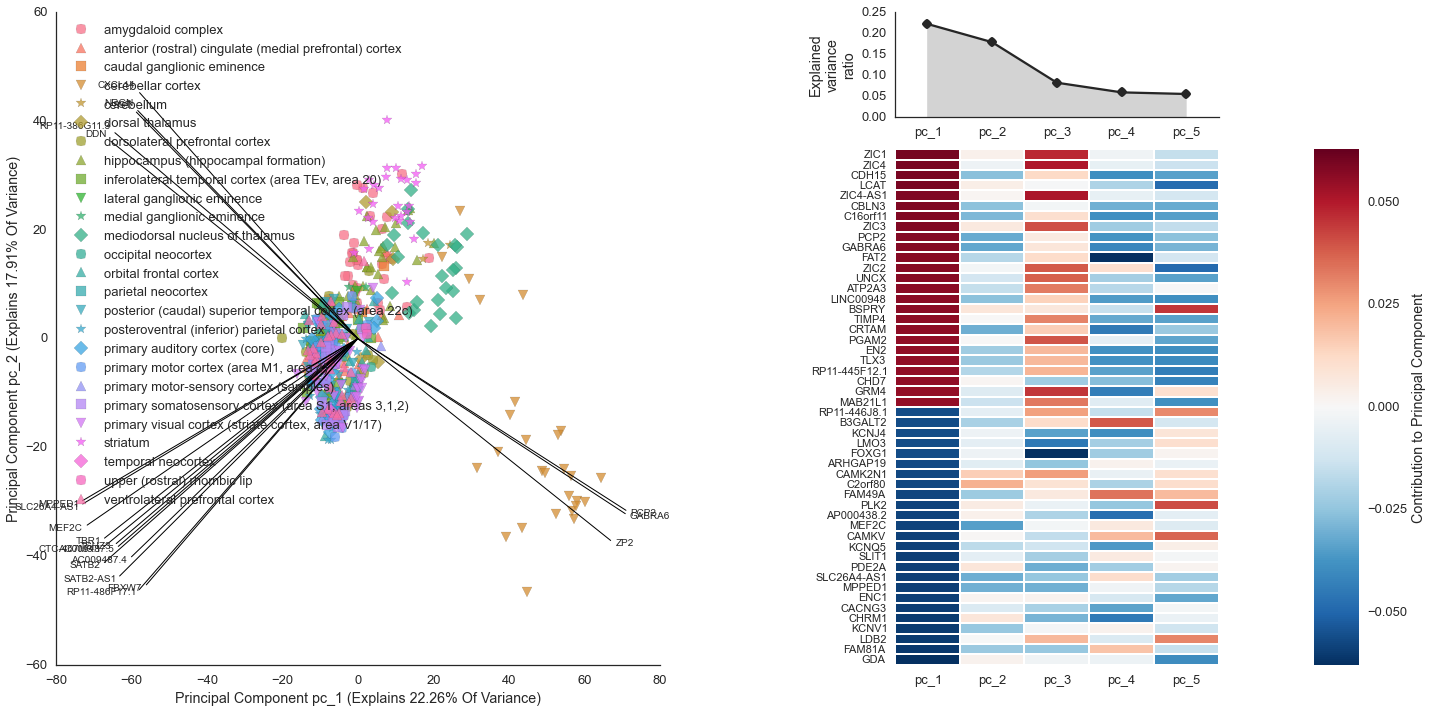

In [47]:
study_corrected = flotilla.Study(columns_metadata,
                                 metadata_phenotype_col='structure_name',
                                 metadata_ignore_subset_cols=['donor_id', 'structure_id', 'structure_name', 'Stage'],
                                 metadata_minimum_samples=3,
                                 expression_data=expression_batch_corrected.T,
                                 species='hg19')
study_corrected.plot_pca()

In [50]:
study_corrected.save('brainspan_batch_corrected')

Wrote datapackage to /Users/olga/flotilla_projects/brainspan_batch_corrected/datapackage.json
